### Assignment 2: Preprocessing and Performance - Detecting ExoPlanets

#### 1. Exploring the dataset

In [22]:
# Loading the data:
import pandas as pd
exoplanet_df = pd.read_csv('exoplanet_dataset.csv')

print(exoplanet_df.shape, f"- {exoplanet_df.shape[0]} rows with {exoplanet_df.shape[1]} features")

pd.set_option('display.max_columns', None)
exoplanet_df.head()

(9564, 49) - 9564 rows with 49 features


,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,NaN,NaN,93.59,29.45,-16.65,35.8,1.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,NaN,NaN,9.11,2.87,-1.62,25.8,2.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,NaN,NaN,39.30,31.04,-10.49,76.3,1.0,q1_q17_dr25_tce,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,NaN,NaN,891.96,668.95,-230.35,505.6,1.0,q1_q17_dr25_tce,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,NaN,NaN,926.16,874.33,-314.24,40.9,1.0,q1_q17_dr25_tce,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [23]:
# Rename the columns into their description for an easier comprehension

exoplanet_df = exoplanet_df.rename(columns = {
    'kepid':'KepID',
    'kepoi_name':'KOIName',
    'kepler_name':'KeplerName',
    'koi_disposition':'ExoplanetArchiveDisposition',
    'koi_pdisposition':'DispositionUsingKeplerData',
    'koi_score':'DispositionScore',
    'koi_fpflag_nt':'NotTransit-LikeFalsePositiveFlag',
    'koi_fpflag_ss':'koi_fpflag_ss',
    'koi_fpflag_co':'CentroidOffsetFalsePositiveFlag',
    'koi_fpflag_ec':'EphemerisMatchIndicatesContaminationFalsePositiveFlag',
    'koi_period':'OrbitalPeriod, days',
    'koi_period_err1':'OrbitalPeriodUpperUnc, days',
    'koi_period_err2':'OrbitalPeriodLowerUnc, days',
    'koi_time0bk':'TransitEpoch, BKJD',
    'koi_time0bk_err1':'TransitEpochUpperUnc, BKJD',
    'koi_time0bk_err2':'TransitEpochLowerUnc, BKJD',
    'koi_impact':'ImpactParamete',
    'koi_impact_err1':'ImpactParameterUpperUnc',
    'koi_impact_err2':'ImpactParameterLowerUnc',
    'koi_duration':'TransitDuration, hrs',
    'koi_duration_err1':'TransitDurationUpperUnc, hrs',
    'koi_duration_err2':'TransitDurationLowerUnc, hrs',
    'koi_depth':'TransitDepth, ppm',
    'koi_insol':'InsolationFlux, Earthflux',
    'koi_insol_err1':'InsolationFluxUpperUnc, Earthflux',
    'koi_insol_err2':'InsolationFluxLowerUnc, Earthflux',
    'koi_model_snr':'TransitSignal-to-Noise',
    'koi_tce_plnt_num':'TCEPlanetNumber',
    'koi_tce_delivname':'TCEDeliver',
    'koi_steff':'StellarEffectiveTemperature, K',
    'koi_steff_err1':'StellarEffectiveTemperatureUpperUnc, K',
    'koi_steff_err2':'StellarEffectiveTemperatureLowerUnc, K',
    'koi_depth_err1':'TransitDepthUpperUnc, ppm',
    'koi_depth_err2':'TransitDepthLowerUnc, ppm',
    'koi_prad':'PlanetaryRadius, Earthradii',
    'koi_prad_err1':'PlanetaryRadiusUpperUnc, Earthradii',
    'koi_prad_err2':'PlanetaryRadiusLowerUnc, Earthradii',
    'koi_teq':'EquilibriumTemperature, K',
    'koi_teq_err1':'EquilibriumTemperatureUpperUnc, K',
    'koi_teq_err2':'EquilibriumTemperatureLowerUnc, K',
    'koi_slogg':'StellarSurfaceGravity, log10(cm/s^2)',
    'koi_slogg_err1':'StellarSurfaceGravityUpperUnc, log10(cm/s^2)',
    'koi_slogg_err2':'StellarSurfaceGravityLowerUnc, log10(cm/s^2)',
    'koi_srad':'StellarRadius, Solarradii',
    'koi_srad_err1':'StellarRadiusUpperUnc, Solarradii',
    'koi_srad_err2':'StellarRadiusLowerUnc, Solarradii',
    'ra':'RA, decimaldegrees',
    'dec':'Dec, decimaldegrees',
    'koi_kepmag':'Kepler-band, mag'
})
exoplanet_df

,KepID,KOIName,KeplerName,ExoplanetArchiveDisposition,DispositionUsingKeplerData,DispositionScore,NotTransit-LikeFalsePositiveFlag,koi_fpflag_ss,CentroidOffsetFalsePositiveFlag,EphemerisMatchIndicatesContaminationFalsePositiveFlag,"OrbitalPeriod, days","OrbitalPeriodUpperUnc, days","OrbitalPeriodLowerUnc, days","TransitEpoch, BKJD","TransitEpochUpperUnc, BKJD","TransitEpochLowerUnc, BKJD",ImpactParamete,ImpactParameterUpperUnc,ImpactParameterLowerUnc,"TransitDuration, hrs","TransitDurationUpperUnc, hrs","TransitDurationLowerUnc, hrs","TransitDepth, ppm","TransitDepthUpperUnc, ppm","TransitDepthLowerUnc, ppm","PlanetaryRadius, Earthradii","PlanetaryRadiusUpperUnc, Earthradii","PlanetaryRadiusLowerUnc, Earthradii","EquilibriumTemperature, K","EquilibriumTemperatureUpperUnc, K","EquilibriumTemperatureLowerUnc, K","InsolationFlux, Earthflux","InsolationFluxUpperUnc, Earthflux","InsolationFluxLowerUnc, Earthflux",TransitSignal-to-Noise,TCEPlanetNumber,TCEDeliver,"StellarEffectiveTemperature, K","StellarEffectiveTemperatureUpperUnc, K","StellarEffectiveTemperatureLowerUnc, K","StellarSurfaceGravity, log10(cm/s^2)","StellarSurfaceGravityUpperUnc, log10(cm/s^2)","StellarSurfaceGravityLowerUnc, log10(cm/s^2)","StellarRadius, Solarradii","StellarRadiusUpperUnc, Solarradii","StellarRadiusLowerUnc, Solarradii","RA, decimaldegrees","Dec, decimaldegrees","Kepler-band, mag"
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,NaN,NaN,93.59,29.45,-16.65,35.8,1.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,NaN,NaN,9.11,2.87,-1.62,25.8,2.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,NaN,NaN,39.30,31.04,-10.49,76.3,1.0,q1_q17_dr25_tce,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,NaN,NaN,891.96,668.95,-230.35,505.6,1.0,q1_q17_dr25_tce,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,NaN,NaN,926.16,874.33,-314.24,40.9,1.0,q1_q17_dr25_tce,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,10090151,K07985.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,0,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,-0.000170,1.252,0.051,-0.049,3.22210,0.01740,-0.01740,1579.2,4.6,-4.6,29.35,7.70,-2.57,2088.0,NaN,NaN,4500.53,3406.38,-1175.26,453.3,1.0,q1_q17_dr25_tce,5638.0,139.0,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9560,10128825,K07986.01,NaN,CANDIDATE,CANDIDATE,0.497,0,0,0,0,1.739849,1.780000e-05,-1.780000e-05,133.001270,0.007690,-0.007690,0.043,0.423,-0.043,3.11400,0.22900,-0.22900,48.5,5.4,-5.4,0.72,0.24,-0.08,1608.0,NaN,NaN,1585.81,1537.86,-502.22,10.6,1.0,q1_q17_dr25_tce,6119.0,165.0,

#### 1.1 Updated data type value analysis

In [24]:
exoplanet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 49 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   KepID                                                  9564 non-null   int64  
 1   KOIName                                                9564 non-null   object 
 2   KeplerName                                             2673 non-null   object 
 3   ExoplanetArchiveDisposition                            9564 non-null   object 
 4   DispositionUsingKeplerData                             9564 non-null   object 
 5   DispositionScore                                       8054 non-null   float64
 6   NotTransit-LikeFalsePositiveFlag                       9564 non-null   int64  
 7   koi_fpflag_ss                                          9564 non-null   int64  
 8   CentroidOffsetFalsePositiveFlag                 

In [25]:
exoplanet_df.isnull()

,KepID,KOIName,KeplerName,ExoplanetArchiveDisposition,DispositionUsingKeplerData,DispositionScore,NotTransit-LikeFalsePositiveFlag,koi_fpflag_ss,CentroidOffsetFalsePositiveFlag,EphemerisMatchIndicatesContaminationFalsePositiveFlag,"OrbitalPeriod, days","OrbitalPeriodUpperUnc, days","OrbitalPeriodLowerUnc, days","TransitEpoch, BKJD","TransitEpochUpperUnc, BKJD","TransitEpochLowerUnc, BKJD",ImpactParamete,ImpactParameterUpperUnc,ImpactParameterLowerUnc,"TransitDuration, hrs","TransitDurationUpperUnc, hrs","TransitDurationLowerUnc, hrs","TransitDepth, ppm","TransitDepthUpperUnc, ppm","TransitDepthLowerUnc, ppm","PlanetaryRadius, Earthradii","PlanetaryRadiusUpperUnc, Earthradii","PlanetaryRadiusLowerUnc, Earthradii","EquilibriumTemperature, K","EquilibriumTemperatureUpperUnc, K","EquilibriumTemperatureLowerUnc, K","InsolationFlux, Earthflux","InsolationFluxUpperUnc, Earthflux","InsolationFluxLowerUnc, Earthflux",TransitSignal-to-Noise,TCEPlanetNumber,TCEDeliver,"StellarEffectiveTemperature, K","StellarEffectiveTemperatureUpperUnc, K","StellarEffectiveTemperatureLowerUnc, K","StellarSurfaceGravity, log10(cm/s^2)","StellarSurfaceGravityUpperUnc, log10(cm/s^2)","StellarSurfaceGravityLowerUnc, log10(cm/s^2)","StellarRadius, Solarradii","StellarRadiusUpperUnc, Solarradii","StellarRadiusLowerUnc, Solarradii","RA, decimaldegrees","Dec, decimaldegrees","Kepler-band, mag"
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9560,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9561,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9562,False,False,True,False,False,False,False,False,False,Fals

#### 1.2 Target identification and modelling

DispositionUsingKeplerData
FALSE POSITIVE    4847
CANDIDATE         4717
Name: count, dtype: int64


/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


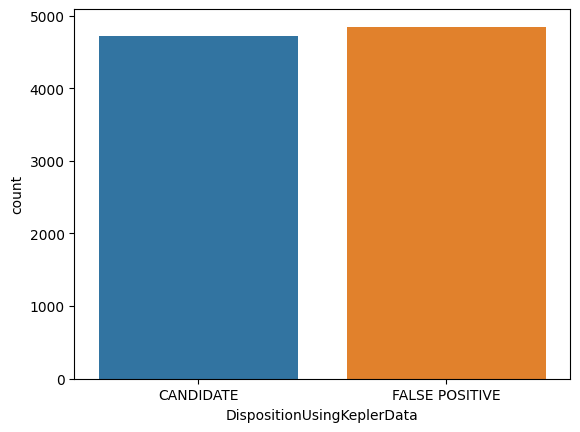

In [5]:
import seaborn as sns
sns.countplot(x = exoplanet_df['DispositionUsingKeplerData'])
print(exoplanet_df['DispositionUsingKeplerData'].value_counts())

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


ExoplanetArchiveDisposition
FALSE POSITIVE    4839
CONFIRMED         2671
CANDIDATE         2054
Name: count, dtype: int64


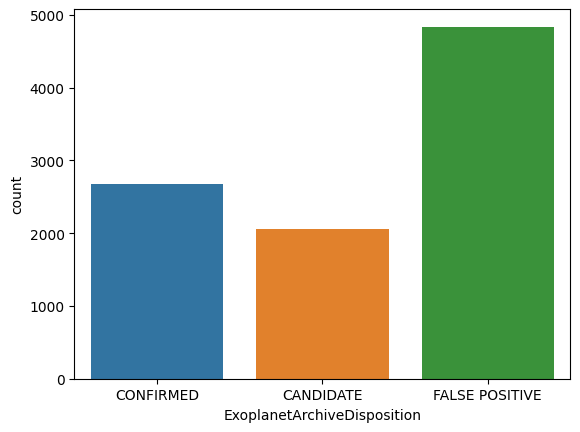

In [6]:
sns.countplot(x = exoplanet_df['ExoplanetArchiveDisposition'])
print(exoplanet_df['ExoplanetArchiveDisposition'].value_counts())

#### Task 1.3.1 - Percentage of missing values in each colum

In [7]:
percent_missing = exoplanet_df.isnull().sum() * 100 / len(exoplanet_df)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', ascending = False, inplace = True)
missing_value_df

,percent_missing
"EquilibriumTemperatureLowerUnc, K",100.000000
"EquilibriumTemperatureUpperUnc, K",100.000000
KeplerName,72.051443
DispositionScore,15.788373
"StellarEffectiveTemperatureLowerUnc, K",5.050188
"StellarRadiusLowerUnc, Solarradii",4.893350
"StellarRadiusUpperUnc, Solarradii",4.893350
"StellarSurfaceGravityLowerUnc, log10(cm/s^2)",4.893350
"StellarSurfaceGravityUpperUnc, log10(cm/s^2)",4.893350
"StellarEffectiveTemperatureUpperUnc, K",4.893350


#### Task 1.3.2 - Visualize the missing values of the columns with the 5 most percentage of missing value

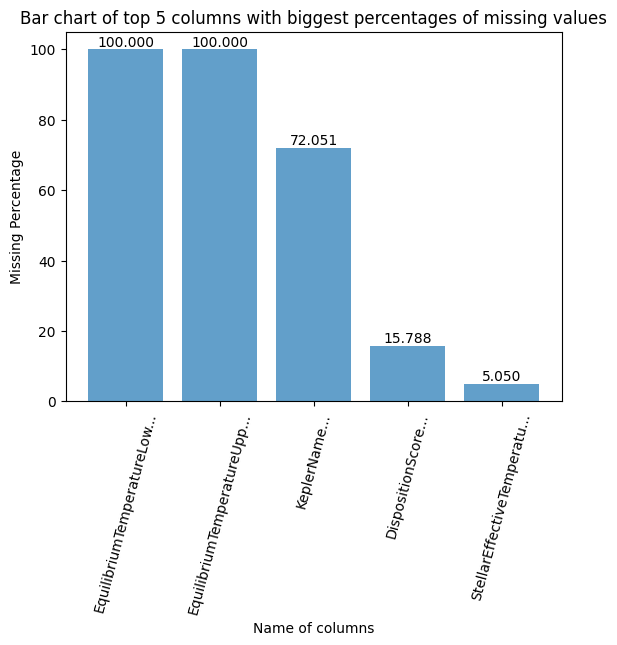

In [8]:
import matplotlib.pyplot as plt

missing_value_df.sort_values('percent_missing', ascending = False, inplace = True)
top_5_missing_columns = missing_value_df.head(5)

x = [f"{str(column_name)[:25]}..." for column_name in top_5_missing_columns.index]
y = list(top_5_missing_columns['percent_missing'])

# Create a bar chart
plt.bar(x, y, align = 'center', alpha = 0.7)

# Add labels and title
plt.xlabel('Name of columns')
plt.ylabel('Missing Percentage')
plt.title('Bar chart of top 5 columns with biggest percentages of missing values')

# Rotate x-axis labels for better readability
plt.xticks(rotation = 75)

# Add annotations to display values on top of the bars
for i, v in enumerate(y):
    plt.text(i, v + 0.02, '{:.3f}'.format(v), color='black', ha='center', va='bottom')

# Show the plot
plt.show()

#### Task 1.3.3 - Identify potential outliers of the numeric features

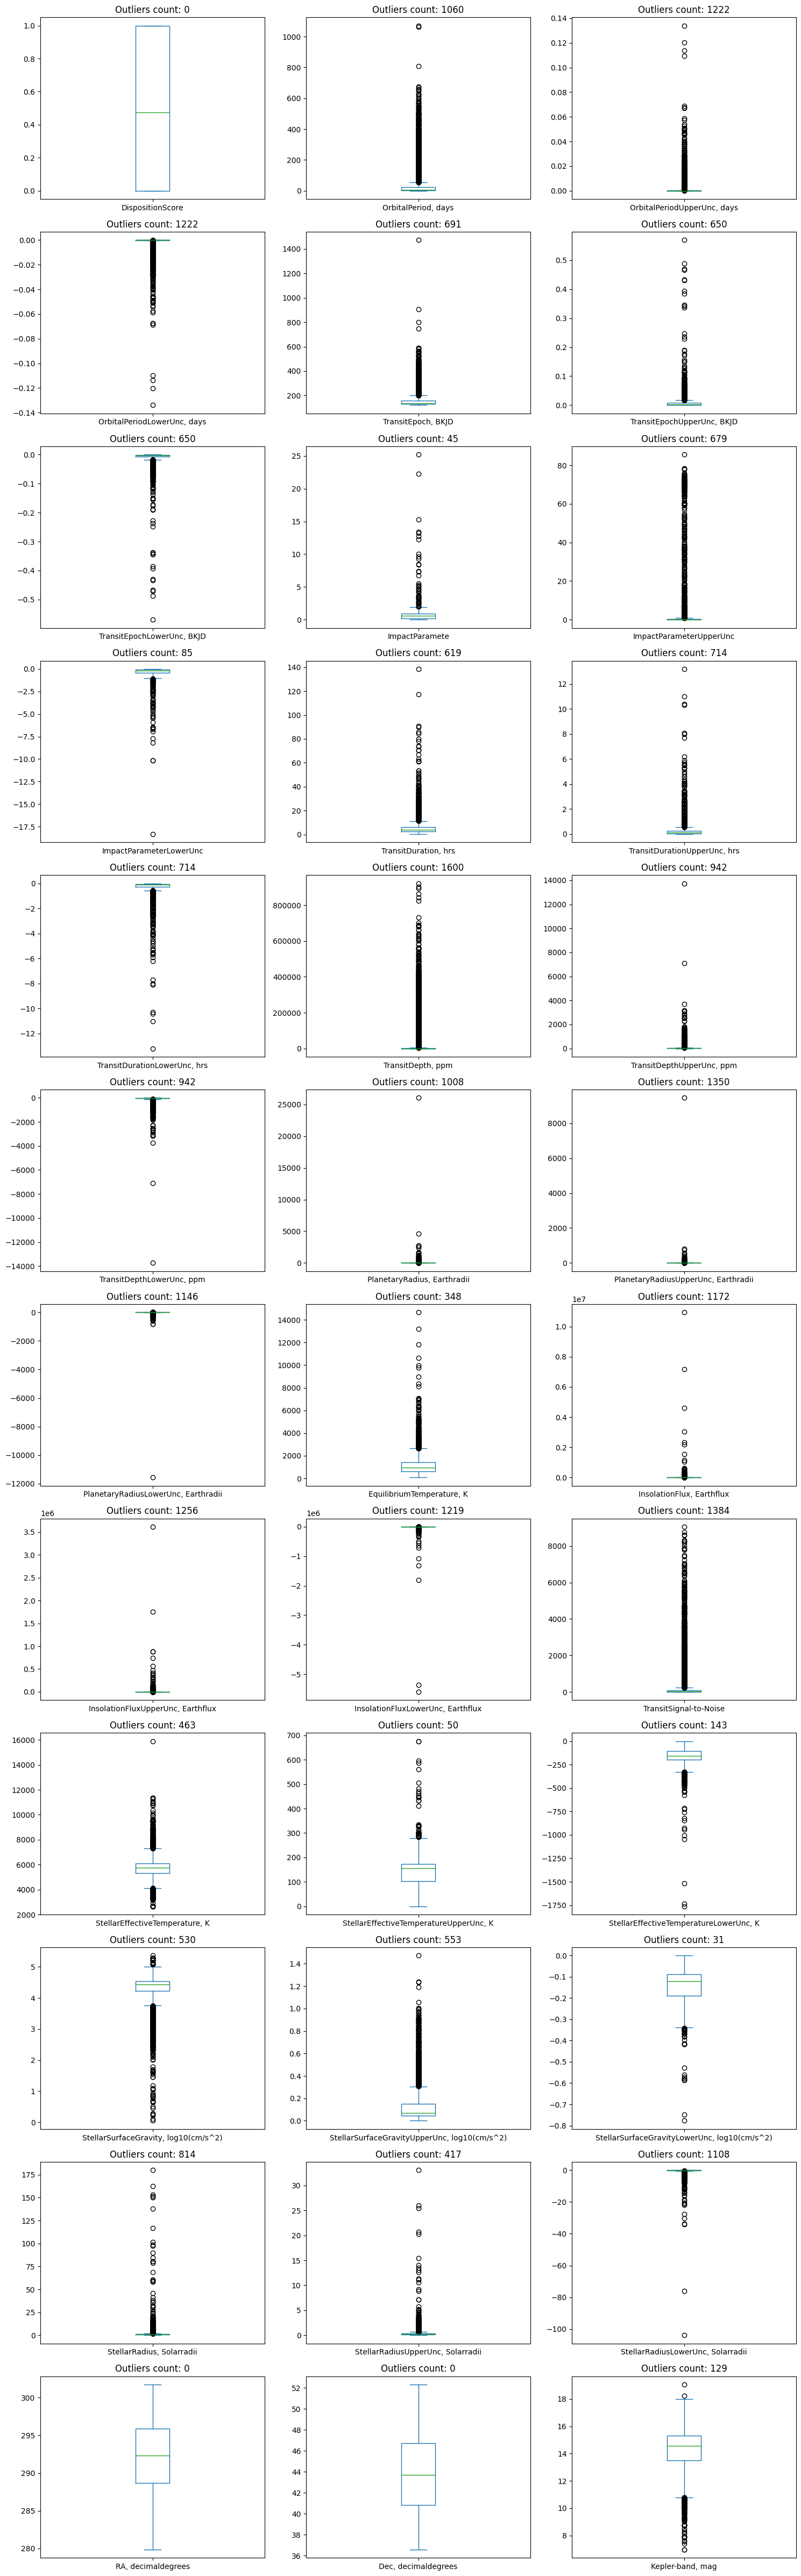

In [9]:
# Exclude columns which don't provide any value for the boxplots
exclude_columns = [
    'EquilibriumTemperatureUpperUnc, K', # Since this column contains all NaN-s
    'EquilibriumTemperatureLowerUnc, K', # Since this column contains all NaN-s
    'TCEPlanetNumber'                    # Since this is a categorical features, box plots are primarily used to visualize the distribution of continuous data
] 

df = exoplanet_df.select_dtypes(include = 'float64').drop(columns = exclude_columns, errors ='ignore').dropna()

# Calculate number of columns and rows based on layout
num_columns = len(df.columns)
if num_columns <= 3:
    num_rows = 1
else:
    num_rows = (num_columns + 2) // 3

# Create subplots with dynamic layout
fig, axes = plt.subplots(num_rows, min(3, num_columns), figsize=(15, 4 * num_rows))

# Flatten the axes array if num_rows > 1
axes = axes.flatten()

# Loop through each column and draw a subplot
for i, col in enumerate(df.columns):
    box_plot = df[col].plot(kind = 'box', ax = axes[i])

    # Calculate the number of outliers
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]

    # Set the title of the plot with the number of outliers
    num_outliers = len(outliers)
    axes[i].set_title(f'Outliers count: {num_outliers}')

# Remove empty subplots if any
for i in range(num_columns, num_rows * 3):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

### 2. Feature Engineering

#### Tasks 2.1 - 2.3 - Remove NaN columns and rows, keep only relevant columns

In [10]:
# Remove columns with 100% missing data
exoplanet_df = exoplanet_df.drop(['EquilibriumTemperatureLowerUnc, K', 'EquilibriumTemperatureUpperUnc, K'], axis='columns')
# Filter irrelevant columns
exoplanet_df = exoplanet_df.drop(['KepID', 'KOIName', 'KeplerName', 'TCEDeliver'], axis = 'columns')
# Remove rows with missing values, NaN, nulls and/or infinite values
exoplanet_df = exoplanet_df.dropna()

exoplanet_df

,ExoplanetArchiveDisposition,DispositionUsingKeplerData,DispositionScore,NotTransit-LikeFalsePositiveFlag,koi_fpflag_ss,CentroidOffsetFalsePositiveFlag,EphemerisMatchIndicatesContaminationFalsePositiveFlag,"OrbitalPeriod, days","OrbitalPeriodUpperUnc, days","OrbitalPeriodLowerUnc, days","TransitEpoch, BKJD","TransitEpochUpperUnc, BKJD","TransitEpochLowerUnc, BKJD",ImpactParamete,ImpactParameterUpperUnc,ImpactParameterLowerUnc,"TransitDuration, hrs","TransitDurationUpperUnc, hrs","TransitDurationLowerUnc, hrs","TransitDepth, ppm","TransitDepthUpperUnc, ppm","TransitDepthLowerUnc, ppm","PlanetaryRadius, Earthradii","PlanetaryRadiusUpperUnc, Earthradii","PlanetaryRadiusLowerUnc, Earthradii","EquilibriumTemperature, K","InsolationFlux, Earthflux","InsolationFluxUpperUnc, Earthflux","InsolationFluxLowerUnc, Earthflux",TransitSignal-to-Noise,TCEPlanetNumber,"StellarEffectiveTemperature, K","StellarEffectiveTemperatureUpperUnc, K","StellarEffectiveTemperatureLowerUnc, K","StellarSurfaceGravity, log10(cm/s^2)","StellarSurfaceGravityUpperUnc, log10(cm/s^2)","StellarSurfaceGravityLowerUnc, log10(cm/s^2)","StellarRadius, Solarradii","StellarRadiusUpperUnc, Solarradii","StellarRadiusLowerUnc, Solarradii","RA, decimaldegrees","Dec, decimaldegrees","Kepler-band, mag"
0,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,93.59,29.45,-16.65,35.8,1.0,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,9.11,2.87,-1.62,25.8,2.0,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,CANDIDATE,CANDIDATE,0.000,0,0,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,39.30,31.04,-10.49,76.3,1.0,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,891.96,668.95,-230.35,505.6,1.0,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,926.16,874.33,-314.24,40.9,1.0,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,0,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,-0.000170,1.252,0.051,-0.049,3.22210,0.01740,-0.01740,1579.2,4.6,-4.6,29.35,7.70,-2.57,2088.0,4500.53,3406.38,-1175.26,453.3,1.0,5638.0,139.0,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9560,CANDIDATE,CANDIDATE,0.497,0,0,0,0,1.739849,1.780000e-05,-1.780000e-05,133.001270,0.007690,-0.007690,0.043,0.423,-0.043,3.11400,0.22900,-0.22900,48.5,5.4,-5.4,0.72,0.24,-0.08,1608.0,1585.81,1537.86,-502.22,10.6,1.0,6119.0,165.0,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
9561,FALSE POSITIVE,FALSE POSITIVE,0.021,0,0,1,0,0.681402,2.434000e-06,-2.434000e-06,132.181750,0.002850,-0.002850,0.147,0.309,-0.147,0.86500,0.16200,-0.16200,103.6,14.7,-14.7,1.07,0.36,-0.11,2218.0,5713.41,5675.74,-1836.94,12.3,1.0,6173.0,193.0,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385
9562,CANDIDATE,CANDIDATE,0.092,0,0,0,0,333.486169,4.235000e-03,-4.235000e-03,153.615010,0.005070,-

#### Tasks 2.4 - Remove outliers

In [11]:
excluded_from_outliers_removal = [
    'TCEPlanetNumber' # Since this is a categorical feature, box plots are primarily used to visualize the distribution of continuous data
] 

# Only remove outliers for columns with continuous type of data
columns_for_outliers_filtering = exoplanet_df.select_dtypes(include = 'float64').drop(columns = exclude_columns, errors ='ignore').columns

cleaned_df = exoplanet_df.copy()  # Create a copy of the original DataFrame

for column in columns_for_outliers_filtering:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    cleaned_df = cleaned_df[(cleaned_df[column] >= lower_bound) & (cleaned_df[column] <= upper_bound)]

# cleaned_df now contains rows where all specified columns are within the defined bounds of the quartile range
cleaned_df

,ExoplanetArchiveDisposition,DispositionUsingKeplerData,DispositionScore,NotTransit-LikeFalsePositiveFlag,koi_fpflag_ss,CentroidOffsetFalsePositiveFlag,EphemerisMatchIndicatesContaminationFalsePositiveFlag,"OrbitalPeriod, days","OrbitalPeriodUpperUnc, days","OrbitalPeriodLowerUnc, days","TransitEpoch, BKJD","TransitEpochUpperUnc, BKJD","TransitEpochLowerUnc, BKJD",ImpactParamete,ImpactParameterUpperUnc,ImpactParameterLowerUnc,"TransitDuration, hrs","TransitDurationUpperUnc, hrs","TransitDurationLowerUnc, hrs","TransitDepth, ppm","TransitDepthUpperUnc, ppm","TransitDepthLowerUnc, ppm","PlanetaryRadius, Earthradii","PlanetaryRadiusUpperUnc, Earthradii","PlanetaryRadiusLowerUnc, Earthradii","EquilibriumTemperature, K","InsolationFlux, Earthflux","InsolationFluxUpperUnc, Earthflux","InsolationFluxLowerUnc, Earthflux",TransitSignal-to-Noise,TCEPlanetNumber,"StellarEffectiveTemperature, K","StellarEffectiveTemperatureUpperUnc, K","StellarEffectiveTemperatureLowerUnc, K","StellarSurfaceGravity, log10(cm/s^2)","StellarSurfaceGravityUpperUnc, log10(cm/s^2)","StellarSurfaceGravityLowerUnc, log10(cm/s^2)","StellarRadius, Solarradii","StellarRadiusUpperUnc, Solarradii","StellarRadiusLowerUnc, Solarradii","RA, decimaldegrees","Dec, decimaldegrees","Kepler-band, mag"
0,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,0.000028,-0.000028,170.53875,0.00216,-0.00216,0.146,0.318,-0.146,2.9575,0.0819,-0.0819,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,93.59,29.45,-16.65,35.8,1.0,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,0.000248,-0.000248,162.51384,0.00352,-0.00352,0.586,0.059,-0.443,4.5070,0.1160,-0.1160,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,9.11,2.87,-1.62,25.8,2.0,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
4,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,0.000004,-0.000004,171.59555,0.00113,-0.00113,0.701,0.235,-0.478,1.6545,0.0420,-0.0420,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,926.16,874.33,-314.24,40.9,1.0,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
5,CONFIRMED,CANDIDATE,1.000,0,0,0,0,11.094321,0.000020,-0.000020,171.20116,0.00141,-0.00141,0.538,0.030,-0.428,4.5945,0.0610,-0.0610,1517.5,24.2,-24.2,3.90,1.27,-0.42,835.0,114.81,112.85,-36.70,66.5,1.0,6046.0,189.0,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
6,CONFIRMED,CANDIDATE,1.000,0,0,0,0,4.134435,0.000010,-0.000010,172.97937,0.00190,-0.00190,0.762,0.139,-0.532,3.1402,0.0673,-0.0673,686.0,18.7,-18.7,2.77,0.90,-0.30,1160.0,427.65,420.33,-136.70,40.2,2.0,6046.0,189.0,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9513,FALSE POSITIVE,FALSE POSITIVE,0.000,0,0,0,1,1.756471,0.000015,-0.000015,132.02757,0.00802,-0.00802,0.023,0.442,-0.023,2.5380,0.2650,-0.2650,69.5,7.6,-7.6,0.69,0.19,-0.06,1405.0,924.14,740.64,-231.04,10.9,1.0,5813.0,157.0,-157.0,4.561,0.033,-0.176,0.833,0.227,-0.071,296.14072,50.279949,14.723
9514,CANDIDATE,CANDIDATE,0.959,0,0,0,0,1.985146,0.000012,-0.000012,132.02682,0.00479,-0.00479,0.126,0.326,-0.126,1.6250,0.1540,-0.1540,233.4,25.2,-25.2,1.28,0.28,-0.11,1299.0,675.28,446.07,-178.35,11.0,1.0,5581.0,149.0,-166.0,4.559,0.036,-0.153,0.845,0.188,-0.075,282.03058,46.750809,15.988
9520,CANDIDATE,CANDIDATE,0.975,0,0,0,0,5.825617,0.000087,-0.000087,136.03690,0.01170,-0.01170,0.635,0.220,-0.434,3.2460,0.3350,-0.3350,142.8,18.8,-18.8,1.21,0.36,-0.15,1037.0,273.08,242.16,-90.75,9.2,1.0,5999.0,180.0,-198.0,4.459,0.067,-0.202,0.967,0.285,-0.122,297.58023,46.719952,15.449
9540,FALSE POSITIVE,FALSE POSITIVE,0.000,0,0,1,1,1.332558,0.000024,-0.000024,132.06310,0.01430,-0.01430,0.397,0.075,-0.397,4.7400,0.5460,-0.5460,48.7,9.4,-9.4,0.62,0.10,-0.08,1443.0,1025.10,573.49,-334.27,8.7,1.0,5161.0,170.0,-154.0,4.452,0.117,-

#### Task 2.5 - Create a correlation matrix

In [12]:
# Correlation matrix
temp_df = cleaned_df.drop(['ExoplanetArchiveDisposition', 'DispositionUsingKeplerData'], axis = 'columns')
temp_df.corr()

,DispositionScore,NotTransit-LikeFalsePositiveFlag,koi_fpflag_ss,CentroidOffsetFalsePositiveFlag,EphemerisMatchIndicatesContaminationFalsePositiveFlag,"OrbitalPeriod, days","OrbitalPeriodUpperUnc, days","OrbitalPeriodLowerUnc, days","TransitEpoch, BKJD","TransitEpochUpperUnc, BKJD","TransitEpochLowerUnc, BKJD",ImpactParamete,ImpactParameterUpperUnc,ImpactParameterLowerUnc,"TransitDuration, hrs","TransitDurationUpperUnc, hrs","TransitDurationLowerUnc, hrs","TransitDepth, ppm","TransitDepthUpperUnc, ppm","TransitDepthLowerUnc, ppm","PlanetaryRadius, Earthradii","PlanetaryRadiusUpperUnc, Earthradii","PlanetaryRadiusLowerUnc, Earthradii","EquilibriumTemperature, K","InsolationFlux, Earthflux","InsolationFluxUpperUnc, Earthflux","InsolationFluxLowerUnc, Earthflux",TransitSignal-to-Noise,TCEPlanetNumber,"StellarEffectiveTemperature, K","StellarEffectiveTemperatureUpperUnc, K","StellarEffectiveTemperatureLowerUnc, K","StellarSurfaceGravity, log10(cm/s^2)","StellarSurfaceGravityUpperUnc, log10(cm/s^2)","StellarSurfaceGravityLowerUnc, log10(cm/s^2)","StellarRadius, Solarradii","StellarRadiusUpperUnc, Solarradii","StellarRadiusLowerUnc, Solarradii","RA, decimaldegrees","Dec, decimaldegrees","Kepler-band, mag"
DispositionScore,1.000000,0.007215,-0.450893,-0.857530,-0.649517,0.250827,0.118136,-0.118136,0.170938,-0.206349,0.206349,-0.053087,-0.041482,-0.060468,0.034770,-0.277868,0.277868,0.080747,0.041561,-0.041561,-0.053604,-0.109015,0.043108,-0.357905,-0.381331,-0.418399,0.367495,0.058792,0.158477,0.035381,-0.327913,0.273425,-0.178731,0.068826,0.118699,0.175407,-0.061735,-0.068414,-0.141423,0.071897,-0.112897
NotTransit-LikeFalsePositiveFlag,0.007215,1.000000,-0.004725,-0.006544,-0.004890,0.009119,-0.002445,0.002445,0.030453,-0.011847,0.011847,-0.006719,-0.010421,0.000322,0.005539,-0.010085,0.010085,0.011166,0.008707,-0.008707,0.003474,-0.000467,0.001077,-0.018387,-0.010759,-0.010493,0.010942,0.001913,-0.008750,-0.014374,0.021598,-0.007655,0.010309,-0.011708,0.005126,-0.009619,-0.008701,0.009386,0.024417,0.021402,0.004258
koi_fpflag_ss,-0.450893,-0.004725,1.000000,0.395589,0.331627,-0.117444,-0.103967,0.103967,-0.032046,-0.059477,0.059477,0.096853,-0.009449,0.048657,-0.032808,0.014050,-0.014050,0.096648,0.023008,-0.023008,0.178489,0.189417,-0.141686,0.192522,0.222232,0.218934,-0.213263,0.105714,-0.104106,-0.009931,0.178677,-0.132862,0.086580,-0.025091,-0.046431,-0.087286,0.021387,0.031601,0.042444,-0.011980,0.053882
CentroidOffsetFalsePositiveFlag,-0.857530,-0.006544,0.395589,1.000000,0.598790,-0.238910,-0.140585,0.140585,-0.147982,0.150715,-0.150715,0.059488,0.046445,0.054607,-0.019929,0.225535,-0.225535,-0.072506,-0.050100,0.050100,0.078296,0.132346,-0.053372,0.322721,0.332836,0.383789,-0.327531,-0.034837,-0.173939,-0.017189,0.302614,-0.259396,0.164979,-0.066439,-0.137217,-0.160546,0.077884,0.065740,0.152333,-0.066113,0.118865
EphemerisMatchIndicatesContaminationFalsePositiveFlag,-0.649517,-0.004890,0.331627,0.598790,1.000000,-0.207703,-0.139791,0.139791,-0.111380,0.168904,-0.168904,0.034204,0.046848,0.050276,0.045290,0.208780,-0.208780,-0.071783,-0.078397,0.078397,0.039961,0.089437,-0.022158,0.277228,0.284550,0.318327,-0.263915,-0.027525,-0.128757,-0.021254,0.206750,-0.167921,0.135242,-0.066269,-0.091967,-0.132336,0.034129,0.071819,0.063006,-0.009501,0.075751
"OrbitalPeriod, days",0.250827,0.009119,-0.117444,-0.238910,-0.207703,1.000000,0.699622,-0.699622,0.383547,-0.060510,0.060510,0.074814,-0.058577,-0.066132,0.507315,-0.051022,0.051022,0.308259,0.285879,-0.285879,0.152362,0.102820,-0.167862,-0.730384,-0.525417,-0.471782,0.487387,0.115913,0.074622,0.097697,-0.104460,0.081836,-0.143305,0.071831,0.008329,0.143320,0.040267,-0.088610,-0.048658,0.004187,-0.075299
"OrbitalPeriodUpperUnc, days",0.118136,-0.002445,-0.103967,-0.140585,-0.139791,0.699622,1.000000,-1.000000,0.052578,0.496079,-0.496079,0.038890,0.008093,-0.075360,0.463606,0.443404,-0.443404,-0.069434,0.269799,-0.269799,-0.041181,-0.001640,-0.018728,-0.543257,-0.417576,-0.358834

#### Disscusion for the correlation matrix

With a glance at the correlation table we can discover quite a few variables the are related to each other, meaning they most likely explain the same phenomena or they vary because of the same real-life cause.
Some example of such variable are:

PlanetaryRadiusUpperUnc, Earthradii	and PlanetaryRadius, Earthradii which have a correlation value of 0.871274

or

InsolationFlux, Earthflux and EquilibriumTemperature, K with a correlation value of 0.905255

as well as others. To us this means that we could probably drop one of the columns in order to further improve the quality of the model, as having two highly related values which most likely
explain the same is redundant to the model, since it does not provide extra meaning.


We can also notice some variable which are completely negative correlated, for example
TransitDepthUpperUnc, ppm and TransitDepthLowerUnc, ppm which given their name, represent diametrically opposite things,
if one is high we always know the other will be low so it does not also provide a lot of value to our model, therefore it stands to reason that
it can probably be removed.

#### Tasks 2.6

In [13]:
# Map data
mapper = {"FALSE POSITIVE": 0, "CANDIDATE": 1, "CONFIRMED": 2}
cleaned_df["KeplerDispositionStatus"] = cleaned_df["DispositionUsingKeplerData"].map(mapper)
cleaned_df["ArchiveDispositionStatus"] = cleaned_df["ExoplanetArchiveDisposition"].map(mapper)
cleaned_df = cleaned_df.drop(['ExoplanetArchiveDisposition', 'DispositionUsingKeplerData'],axis='columns')
cleaned_df

,DispositionScore,NotTransit-LikeFalsePositiveFlag,koi_fpflag_ss,CentroidOffsetFalsePositiveFlag,EphemerisMatchIndicatesContaminationFalsePositiveFlag,"OrbitalPeriod, days","OrbitalPeriodUpperUnc, days","OrbitalPeriodLowerUnc, days","TransitEpoch, BKJD","TransitEpochUpperUnc, BKJD","TransitEpochLowerUnc, BKJD",ImpactParamete,ImpactParameterUpperUnc,ImpactParameterLowerUnc,"TransitDuration, hrs","TransitDurationUpperUnc, hrs","TransitDurationLowerUnc, hrs","TransitDepth, ppm","TransitDepthUpperUnc, ppm","TransitDepthLowerUnc, ppm","PlanetaryRadius, Earthradii","PlanetaryRadiusUpperUnc, Earthradii","PlanetaryRadiusLowerUnc, Earthradii","EquilibriumTemperature, K","InsolationFlux, Earthflux","InsolationFluxUpperUnc, Earthflux","InsolationFluxLowerUnc, Earthflux",TransitSignal-to-Noise,TCEPlanetNumber,"StellarEffectiveTemperature, K","StellarEffectiveTemperatureUpperUnc, K","StellarEffectiveTemperatureLowerUnc, K","StellarSurfaceGravity, log10(cm/s^2)","StellarSurfaceGravityUpperUnc, log10(cm/s^2)","StellarSurfaceGravityLowerUnc, log10(cm/s^2)","StellarRadius, Solarradii","StellarRadiusUpperUnc, Solarradii","StellarRadiusLowerUnc, Solarradii","RA, decimaldegrees","Dec, decimaldegrees","Kepler-band, mag",KeplerDispositionStatus,ArchiveDispositionStatus
0,1.000,0,0,0,0,9.488036,0.000028,-0.000028,170.53875,0.00216,-0.00216,0.146,0.318,-0.146,2.9575,0.0819,-0.0819,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,93.59,29.45,-16.65,35.8,1.0,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,1,2
1,0.969,0,0,0,0,54.418383,0.000248,-0.000248,162.51384,0.00352,-0.00352,0.586,0.059,-0.443,4.5070,0.1160,-0.1160,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,9.11,2.87,-1.62,25.8,2.0,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,1,2
4,1.000,0,0,0,0,2.525592,0.000004,-0.000004,171.59555,0.00113,-0.00113,0.701,0.235,-0.478,1.6545,0.0420,-0.0420,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,926.16,874.33,-314.24,40.9,1.0,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509,1,2
5,1.000,0,0,0,0,11.094321,0.000020,-0.000020,171.20116,0.00141,-0.00141,0.538,0.030,-0.428,4.5945,0.0610,-0.0610,1517.5,24.2,-24.2,3.90,1.27,-0.42,835.0,114.81,112.85,-36.70,66.5,1.0,6046.0,189.0,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714,1,2
6,1.000,0,0,0,0,4.134435,0.000010,-0.000010,172.97937,0.00190,-0.00190,0.762,0.139,-0.532,3.1402,0.0673,-0.0673,686.0,18.7,-18.7,2.77,0.90,-0.30,1160.0,427.65,420.33,-136.70,40.2,2.0,6046.0,189.0,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9513,0.000,0,0,0,1,1.756471,0.000015,-0.000015,132.02757,0.00802,-0.00802,0.023,0.442,-0.023,2.5380,0.2650,-0.2650,69.5,7.6,-7.6,0.69,0.19,-0.06,1405.0,924.14,740.64,-231.04,10.9,1.0,5813.0,157.0,-157.0,4.561,0.033,-0.176,0.833,0.227,-0.071,296.14072,50.279949,14.723,0,0
9514,0.959,0,0,0,0,1.985146,0.000012,-0.000012,132.02682,0.00479,-0.00479,0.126,0.326,-0.126,1.6250,0.1540,-0.1540,233.4,25.2,-25.2,1.28,0.28,-0.11,1299.0,675.28,446.07,-178.35,11.0,1.0,5581.0,149.0,-166.0,4.559,0.036,-0.153,0.845,0.188,-0.075,282.03058,46.750809,15.988,1,1
9520,0.975,0,0,0,0,5.825617,0.000087,-0.000087,136.03690,0.01170,-0.01170,0.635,0.220,-0.434,3.2460,0.3350,-0.3350,142.8,18.8,-18.8,1.21,0.36,-0.15,1037.0,273.08,242.16,-90.75,9.2,1.0,5999.0,180.0,-198.0,4.459,0.067,-0.202,0.967,0.285,-0.122,297.58023,46.719952,15.449,1,1
9540,0.000,0,0,1,1,1.332558,0.000024,-0.000024,132.06310,0.01430,-0.01430,0.397,0.075,-0.397,4.7400,0.5460,-0.5460,48.7,9.4,-9.4,0.62,0.10,-0.08,1443.0,1025.10,573.49,-334.27,8.7,1.0,5161.0,170.0,-154.0,4.452,0.117,-0.156,0.892,0.152,-0.114,295.15332,46.828011,15.305,0,0


#### Tasks 2.7

In [14]:
#import numpy as np
#cleaned_df['OrbitalPeriod, days'] = np.log2(max(cleaned_df['OrbitalPeriod, days'][:, 2] + 1) - cleaned_df['OrbitalPeriod, days'][:, 2])
#cleaned_df['OrbitalPeriodUpperUnc, days'] = np.log2(cleaned_df['OrbitalPeriodUpperUnc, days'])
#cleaned_df['OrbitalPeriodLowerUnc, days'] = np.log2(cleaned_df['OrbitalPeriodLowerUnc, days'])
from skew_autotransform import skew_autotransform

transformed_df = skew_autotransform(cleaned_df.select_dtypes(include = 'float64'))

/opt/homebrew/lib/python3.11/site-packages/scipy/stats/_morestats.py:935: RuntimeWarning: divide by zero encountered in log
  return (lmb - 1) * np.sum(logdata, axis=0) - N/2 * np.log(variance)
/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_optimize.py:2488: RuntimeWarning: invalid value encountered in scalar subtract
  tmp1 = (x - w) * (fx - fv)
/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_optimize.py:2489: RuntimeWarning: invalid value encountered in scalar subtract
  tmp2 = (x - v) * (fx - fw)


#### Tasks 2.8

In [15]:
labels = cleaned_df['KeplerDispositionStatus']
cleaned_df = cleaned_df.drop(['DispositionScore', 'KeplerDispositionStatus','ArchiveDispositionStatus'], axis='columns')

#### Tasks 2.9

/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

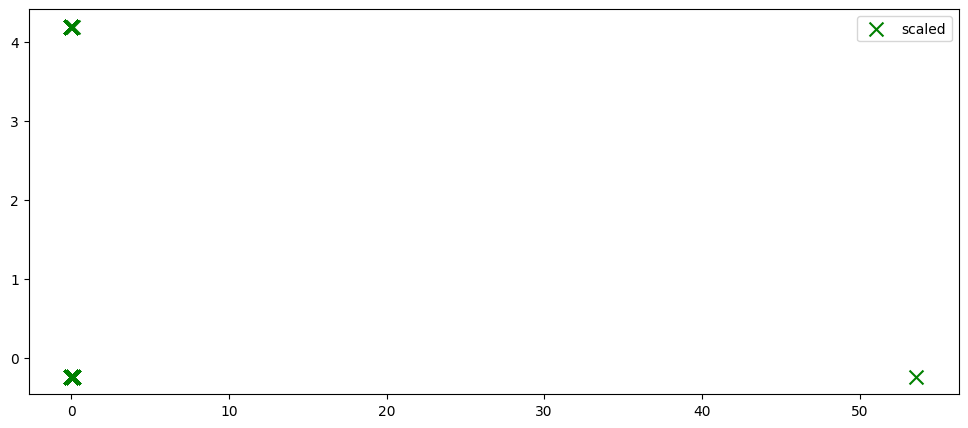

In [16]:
from sklearn import preprocessing
def sci_zscore(X):
    std_scale = preprocessing.StandardScaler(copy=True)
    return std_scale.fit_transform(X)
scaled_df = sci_zscore(cleaned_df)

fig, (ax2) = plt.subplots(1, figsize=(12, 5))

ax2.scatter(scaled_df[:,0], scaled_df[:,1],
        color='g',
        label='scaled',
        alpha=1,
        marker='x',
        s=100
        )

# The scaled data is difficult to visualize because we have 30-ish features in the dataset
ax2.legend()
plt.show()

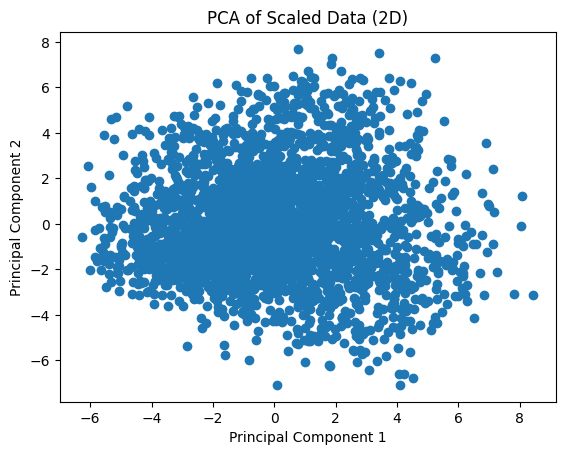

In [26]:
from sklearn.decomposition import PCA

# PCA was not taught up until the assignment but for the sake to see how the data looks
# we apply some PCA and take the 2 highest principal components

# Apply PCA to reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_df)

# Scatter plot the first two principal components
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Scaled Data (2D)')
plt.show()

### Tasks 3+4 Test, Train, Validation, Cross Validation + Models

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Fix the parameter space
parameters = {'n_neighbors': range(1,15)}
grid_search = GridSearchCV(KNeighborsClassifier(), parameters, cv=5, return_train_score=True)

X_train, X_test, y_train, y_test = train_test_split(cleaned_df, labels, random_state=42)


grid_search.fit(X_train, y_train)
predictions = grid_search.predict(X_test)
print("Test score: {:.2f}".format(grid_search.score(X_test, y_test)))
print("Best parameter: {}".format(grid_search.best_params_))
print("Best cross-validation score: {}".format(grid_search.best_score_))
print("Best estimator: {}".format(grid_search.best_estimator_))
pd.DataFrame(grid_search.cv_results_)

/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

Test score: 0.83
Best parameter: {'n_neighbors': 9}
Best cross-validation score: 0.8506455701641317
Best estimator: KNeighborsClassifier(n_neighbors=9)


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001305,0.000077,0.015123,0.014280,1,{'n_neighbors': 1},0.773148,0.777262,0.812065,0.777262,0.812065,0.790360,0.017785,13,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.001337,0.000090,0.008235,0.000426,2,{'n_neighbors': 2},0.740741,0.726218,0.805104,0.742459,0.791183,0.761141,0.031049,14,0.901392,0.900870,0.888116,0.891014,0.893333,0.894945,0.005317
2,0.001304,0.000061,0.008237,0.000496,3,{'n_neighbors': 3},0.821759,0.821346,0.851508,0.816705,0.832947,0.828853,0.012524,10,0.911833,0.897391,0.901449,0.896232,0.893333,0.900048,0.006443
3,0.001298,0.000113,0.007997,0.000264,4,{'n_neighbors': 4},0.814815,0.795824,0.846868,0.788863,0.823666,0.814007,0.020672,12,0.892111,0.886377,0.880580,0.884058,0.881159,0.884857,0.004184
4,0.001255,0.000027,0.008316,0.000230,5,{'n_neighbors': 5},0.844907,0.823666,0.851508,0.832947,0.835267,0.837659,0.009675,9,0.888631,0.885217,0.876522,0.875362,0.876522,0.880451,0.005411
5,0.001266,0.000063,0.008569,0.000321,6,{'n_neighbors': 6},0.831019,0.814385,0.846868,0.823666,0.823666,0.827921,0.010844,11,0.877610,0.878841,0.867246,0.871884,0.874783,0.874073,0.004175
6,0.001394,0.000076,0.010873,0.003936,7,{'n_neighbors': 7},0.851852,0.825986,0.844548,0.853828,0.853828,0.846008,0.010578,7,0.872970,0.874203,0.871884,0.868406,0.869565,0.871406,0.002139
7,0.001298,0.000018,0.008877,0.000629,8,{'n_neighbors': 8},0.849537,0.828306,0.842227,0.851508,0.858469,0.846009,0.010253,6,0.871230,0.873043,0.869565,0.869565,0.867826,0.870246,0.001765
8,0.001321,0.000049,0.008761,0.000371,9,{'n_neighbors': 9},0.858796,0.830626,0.856148,0.853828,0.853828,0.850646,0.010176,1,0.866589,0.871884,0.870725,0.863768,0.863188,0.867231,0.003538
9,0.001345,0.000067,0.009528,0.000545,10,{'n_neighbors': 10},0.849537,0.825986,0.849188,0.851508,0.858469,0.846938,0.010997,5,0.863689,0.871884,0.867246,0.867246,0.864928,0.866999,0.002801


### Task 5 Evaluate

In [18]:
from sklearn.metrics import (confusion_matrix,precision_score,recall_score,f1_score,
    roc_curve,roc_auc_score,precision_recall_curve,accuracy_score,classification_report)
print("Confusion matrix:  \n{}\n".format(confusion_matrix(y_test,predictions)))
print("Accuracy: \n{}\n".format(grid_search.score(X_test,y_test)))
print("Precision: \n{}\n".format(precision_score(y_test,predictions,pos_label=1)))
print("Recall: \n{}\n".format(recall_score(y_test,predictions,pos_label=1)))
print("F1: \n{}".format(f1_score(y_test,predictions,pos_label=1)))

/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

Confusion matrix:  
[[ 51  82]
 [ 40 546]]

Accuracy: 
0.8303198887343533

Precision: 
0.8694267515923567

Recall: 
0.931740614334471

F1: 
0.8995057660626029


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

Precision-Recall curve:

/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

array([0, 1])

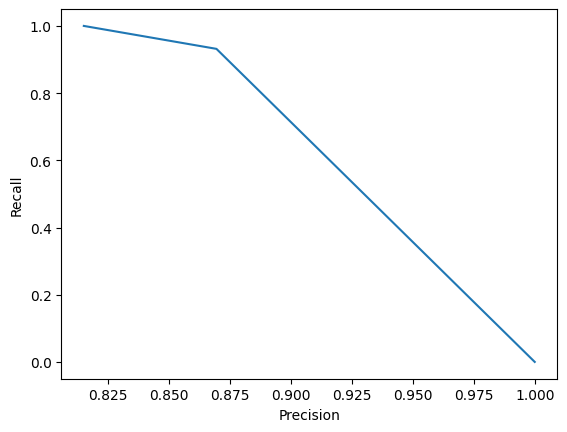

In [19]:
prec,rec,thresh = precision_recall_curve(y_test,grid_search.predict(X_test))
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.plot(prec,rec)
thresh

ROC curve:

Area under curve: 
0.6575996304755061


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

array([2, 1, 0])

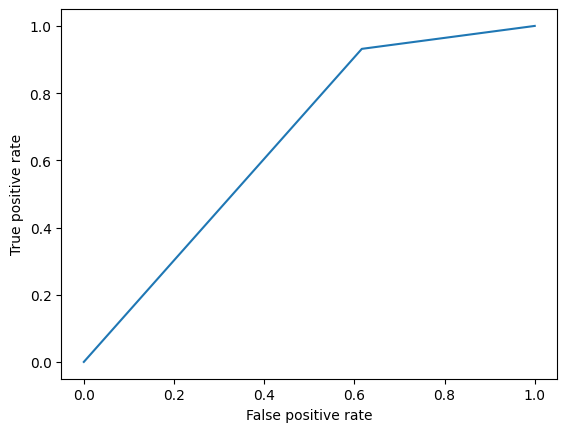

In [20]:
fpr,tpr,thresh = roc_curve(y_test,grid_search.predict(X_test))
plt.plot(fpr,tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
print("Area under curve: \n{}".format(roc_auc_score(y_test,grid_search.predict(X_test))) )
thresh

Confusion matrix

/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

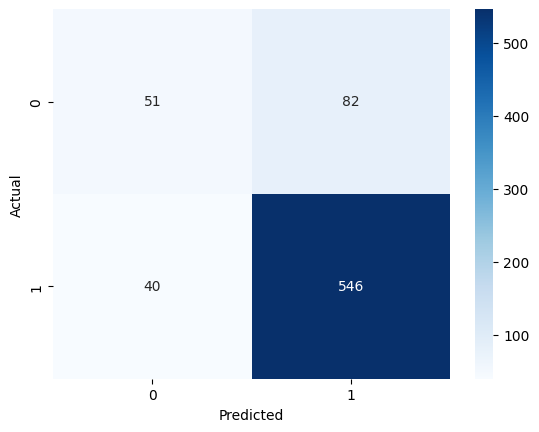

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, predictions)
sns.heatmap(mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()